In [716]:
#untuk pemrosesan data
import pandas as pd
import numpy as np

#untuk keperluan plotting
import matplotlib.pyplot as plt
import seaborn as sns

#analisis statistik
import scipy.stats
from scipy import stats
import scipy.stats as scistats
import statsmodels.api as sm
import math
import statistics

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Preparing

In [717]:
df = pd.read_csv('E:/HACKTIV8/nyc-rolling-sales.csv', skipinitialspace = True)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [722]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [723]:
#mengetahui dimensi data
df.shape

(84548, 22)

In [724]:
#memberi informasi terkait unique values pada tiap kolom
for col in df.columns:
    print("UNIQUE VALUES FOR ",col)
    print("="*30)
    print(df[col].unique())
    print("="*30)

UNIQUE VALUES FOR  Unnamed: 0
[    4     5     6 ... 26737 26738 26739]
UNIQUE VALUES FOR  BOROUGH
[1 2 3 4 5]
UNIQUE VALUES FOR  NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CR

In [725]:
#mengganti 0 di YEAR BUILT dengan np.nan
df['YEAR BUILT']=df['YEAR BUILT'].replace({0:np.nan})

In [726]:
#menghapus kolom 'Unnamed: 0' karena tidak related dengan proses analitis
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [727]:
#menghapus kolom 'EASE-MENT' karena tidak memiliki informasi/nilai
df.drop('EASE-MENT', axis = 1, inplace = True)

In [728]:
# menghapus kolom-kolom yang tidak relevan dengan analisis data statistik
df.drop(labels=['ADDRESS','APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

In [729]:
#'SALE PRICE' harus numerik, missing value diatur ke NaN
df['SALE PRICE']= pd.to_numeric(df['SALE PRICE'], errors='coerce')

# 'LAND SQUARE FEET' dan 'GROSS SQUARE FEET' harus numeric
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# 'SALE DATE' harus datetime
df['SALE DATE']=pd.to_datetime(df['SALE DATE'], errors='coerce')

# kolom yang harus kategorikal
categorical = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
               'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'YEAR BUILT']
for col in categorical:
    df[col] = df[col].astype('category')

In [730]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [731]:
#menghapus semua null values pada kolom dibawah ini
df = df[df['LAND SQUARE FEET'].notnull()]
df = df[df['GROSS SQUARE FEET'].notnull()]
df = df[df['SALE PRICE'].notnull()]

In [732]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,5,0,5,1633.0,6440.0,1900.0,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913.0,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,6,0,6,2369.0,4615.0,1900.0,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920.0,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,24,0,24,4489.0,18523.0,1920.0,2,D9,16232000.0,2016-11-07


Dari data preparing tersebut, dapat dilihat bahwa pada kolom YEAR BUILT memiliki nilai 0 sehingga diubah dahulu menjadi NaN. Selanjutnya, kolom Unnamed: 0 dihapus karena tidak related dengan proses analitis. Lalu kolom EASE-MENT tidak mengandung informasi yang dibutuhkan untuk analisis begitupun kolom ADDRESS, APARTMENT NUMBER, dan ZIP CODE sebagai kolom yang tidak diperlukan untuk analisis berikutnya, sehingga keempat kolom tersebut juga dihapus/dibuang.

In [733]:
#menghitung jumlah baris yang duplikat
sum(df.duplicated())

403

In [734]:
#mengecek semua baris yang duplikat
df[df.duplicated()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,1,0,1,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,1,0,1,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30
4173,1,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,1,0,1,384.0,1152.0,1901.0,1,A5,1375000.0,2016-10-07
5005,1,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,2,1737,25,D3,771,0,771,189025.0,555954.0,1959.0,2,D3,5020000.0,2016-11-07
5006,1,HARLEM-CENTRAL,08 RENTALS - ELEVATOR APARTMENTS,2,1737,25,D3,771,0,771,189025.0,555954.0,1959.0,2,D3,5020000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,1,0,1,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,2,0,2,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,1,0,1,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,1,0,1,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30


In [735]:
#menghapus/membuang baris yang duplikat
df.drop_duplicates(subset = df.columns, keep='first', inplace=True)

#memastikan kembali jumlah baris kolom dan baris setelah drop (final)
df.shape

(47841, 17)

Maka, setelah menyeleksi dan menghapus data yang duplikat (yaitu sebanyak 403 baris) didapatlah baris dan kolom final yang akan dianalisis yaitu sebanyak 47841 baris dan 17 kolom

In [736]:
categorical = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
               'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'YEAR BUILT']  
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

# mengubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categorical:
    df[col] = df[col].astype('str')

# mengubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df[col] = df[col].astype('float64')

# mengubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df[col] = df[col].astype('int64')

In [737]:
df.index = range(0,len(df))

In [738]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [739]:
df_std = pd.DataFrame(df['SALE PRICE'])
std = df_std.describe()
std

,SALE PRICE
count,4.784100e+04
mean,1.159345e+06
std,1.345030e+07
min,0.000000e+00
25%,1.000000e+05
50%,4.850000e+05
75%,8.350000e+05
max,2.210000e+09


# Questions

1. Apakah ada perbedaan unit yang dijual antara kategori kelas yang dibangun dari tahun ke tahun?
2. Apakah ada perbedaan unit yang terjual berdasarkan kategori bangunan?
3. Apa yang dapat Anda temukan tentang real estat New York City dengan melihat catatan transaksi mentah selama satu tahun?
4. Bisakah Anda melihat tren di pasar?

# Mean, Median, Modus

In [740]:
#Mean dan Median pada kolom SALE PRICE
print("Mean SALE PRICE = ", df['SALE PRICE'].mean())
print("Median SALE PRICE = ", df['SALE PRICE'].median())
print("="*30)

#Mean dan Median pada kolom GROSS SQUARE FEET
print("Mean GROSS SQUARE FEET = ", df['GROSS SQUARE FEET'].mean())
print("Median GROSS SQUARE FEET = ", df['GROSS SQUARE FEET'].median())
print("="*30)

#Mean dan Median pada kolom LAND SQUARE FEET
print("Mean LAND SQUARE FEET = ", df['LAND SQUARE FEET'].mean())
print("Median LAND SQUARE FEET = ", df['LAND SQUARE FEET'].median())


Mean SALE PRICE =  1159345.24086035
Median SALE PRICE =  485000.0
Mean GROSS SQUARE FEET =  3500.2662778788067
Median GROSS SQUARE FEET =  1620.0
Mean LAND SQUARE FEET =  3261.7400974059906
Median LAND SQUARE FEET =  2133.0


In [741]:
#MODUS PADA SALE PRICE
print("Modus SALE PRICE: ", df['SALE PRICE'].mode()[0])

Modus SALE PRICE:  0.0


Dari analisis modus diatas dapat dilihat bahwa nilai modus pada SALE PRICE yaitu 0.0. Sehingga, kemungkinan tidak ada nilai yang paling sering muncul di kolom 'SALE PRICE'. Hal ini dapat terjadi jika setiap nilai di kolom tersebut unik atau jumlah kemunculan nilai terbanyak sama untuk beberapa nilai di kolom SALE PRICE.

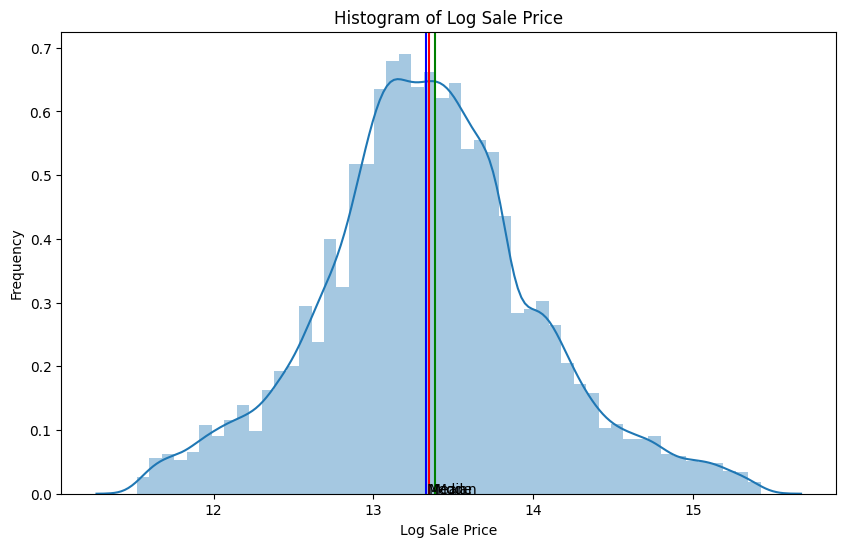

In [742]:
# filter data
df_skewness = df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

# transform data using log
skewness = np.log(df_skewness['SALE PRICE'])

# plot histogram
plt.figure(figsize=(10,6))
sns.distplot(skewness)
plt.title('Histogram of Log Sale Price')
plt.ylabel("Frequency")
plt.xlabel("Log Sale Price")
plt.axvline(skewness.mean(), c='red')
plt.axvline(skewness.median(), c='blue')
plt.axvline(skewness.mode()[0], c='green')
plt.text(skewness.mean(), 0.0007, "Mean")
plt.text(skewness.median(), 0.0009, "Median")
plt.text(skewness.mode()[0], 0.0008, "Mode")
plt.show()


Dari Skewness diatas dapat disimpulkan :
Berdasarkan pada Skewness diatas (Histogram of SALE PRICE), bahwa kondisi tersebut cenderung Positive Skewness atau Kemiringan Positif berarti mean (garis berwarna merah) berada di sebelah kanan dari median (garis biru). Hal ini dilihat dari nilai mean yang lebih besar daripada modus ataupun median (Mean = 1159345.24086035 dan Median = 485000.0), sehingga distribusi miring ke kanan yang mengakibatkan ekor disisi kanan kurva lebih panjang daripada ekor disisi kiri. Hal ini menunjukkan bahwa ada nilai-nilai yang sangat tinggi pada distribusi data tersebut.

In [743]:
#MODUS PADA BUILDING CLASS CATEGORY
print("Modus BUILDING CLASS CATEGORY: ", df['BUILDING CLASS CATEGORY'].mode()[0])
df['BUILDING CLASS CATEGORY'].value_counts()

Modus BUILDING CLASS CATEGORY:  01 ONE FAMILY DWELLINGS                    


BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                         14334
02 TWO FAMILY DWELLINGS                         12960
03 THREE FAMILY DWELLINGS                        3638
13 CONDOS - ELEVATOR APARTMENTS                  3244
10 COOPS - ELEVATOR APARTMENTS                   3154
07 RENTALS - WALKUP APARTMENTS                   2728
15 CONDOS - 2-10 UNIT RESIDENTIAL                 953
44 CONDO PARKING                                  782
04 TAX CLASS 1 CONDOS                             738
22 STORE BUILDINGS                                707
09 COOPS - WALKUP APARTMENTS                      610
14 RENTALS - 4-10 UNIT                            544
05 TAX CLASS 1 VACANT LAND                        509
12 CONDOS - WALKUP APARTMENTS                     458
29 COMMERCIAL GARAGES                             422
08 RENTALS - ELEVATOR APARTMENTS                  278
21 OFFICE BUILDINGS                               274
30 WAREHOUSES                                     250
31 C

Berdasarkan analisis modus diatas, dapat dilihat bahwa modus dari BULDING CLASS CATEGORY sesuai dengan data NYC Property Sales yaitu 01 ONE FAMILY DWELLINGS dengan jumlah terjual sebanyak 14334 bangunan, disusul oleh TWO FAMILY DWELLINGS sebesar 12960 bangunan. Sedangkan yang paling sedikit adalah SPECIAL CONDO BILLING LOTS yaitu terjual sebanyak 1 bangunan. Dapat dilihat pula bahwa penjualan properti di kota New York cenderung lebih tinggi pada kategori Building Class tertentu seperti Family Dwellings dan Condos.

# Range

In [744]:
range1 = df['SALE PRICE'].max() - df['SALE PRICE'].min()
range2 = df['GROSS SQUARE FEET'].max() - df['GROSS SQUARE FEET'].min()
print("Range pada kolom SALE PRICE: ", range1)
print("Range pada kolom GROSS SQUARE FEET: ", range2)

Range pada kolom SALE PRICE:  2210000000.0
Range pada kolom GROSS SQUARE FEET:  3750565.0


# Variance

In [745]:
variance1 = df['SALE PRICE'].var(ddof=1)
print('Sampel Variance dari SALE PRICE = ', variance1)

Sampel Variance dari SALE PRICE =  180910462656483.56


# Standard Deviation

In [746]:
print('Standard Deviation dari SALE PRICE = ', variance1**0.5)

Standard Deviation dari SALE PRICE =  13450296.006277466


In [747]:
print('Standard Deviation dari SALE PRICE = ', df['SALE PRICE'].std(ddof=1))

Standard Deviation dari SALE PRICE =  13450296.006277466


# Probability Distribution

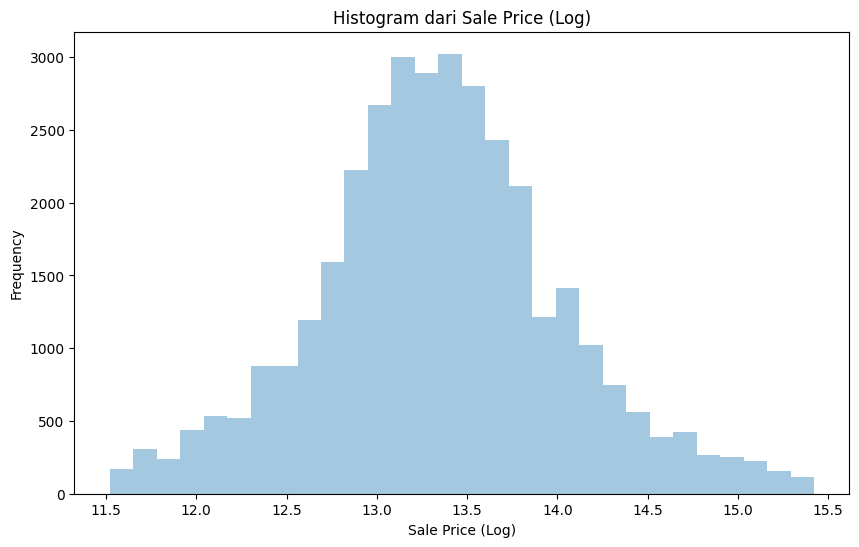

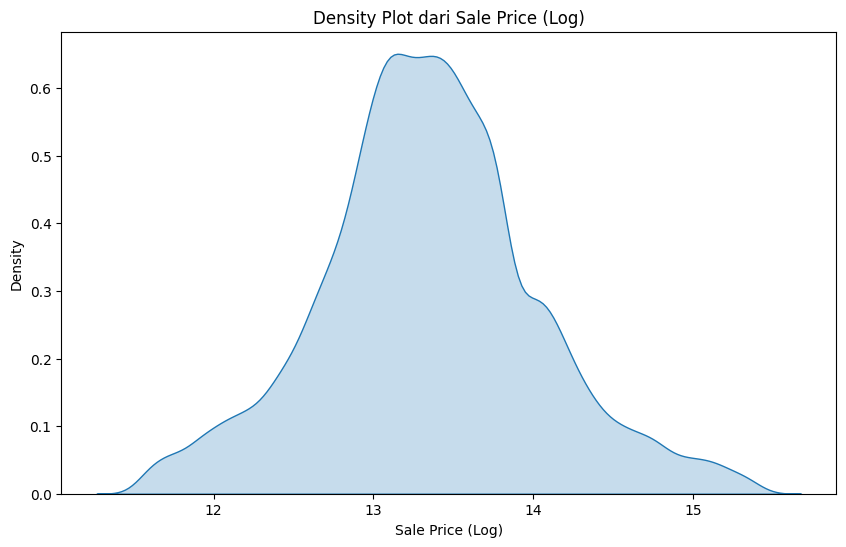

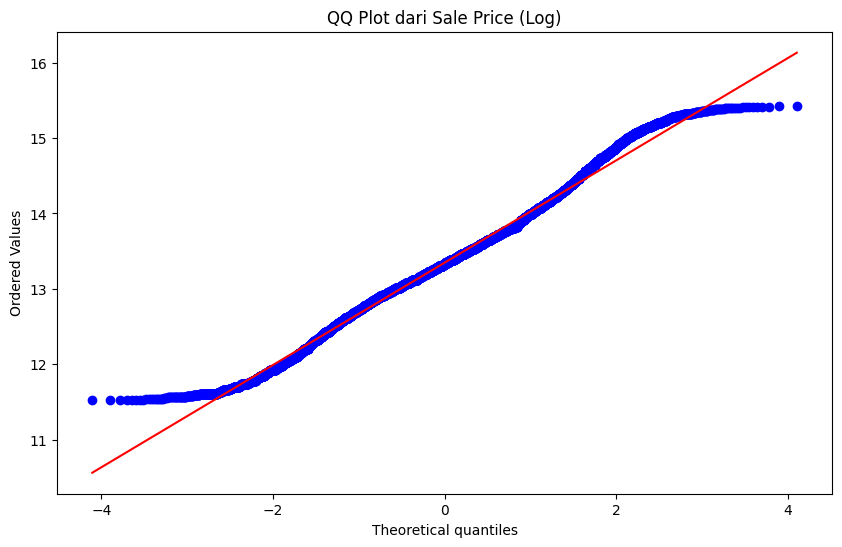

In [748]:
# filter data
df_skewness = df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

# transform data using log
skewness = np.log(df_skewness['SALE PRICE'])

# Plot histogram
plt.figure(figsize=(10,6))
sns.distplot(skewness, kde=False, bins=30)
plt.title('Histogram dari Sale Price (Log)')
plt.xlabel('Sale Price (Log)')
plt.ylabel('Frequency')
plt.show()

# Plot density plot
plt.figure(figsize=(10,6))
sns.kdeplot(skewness, shade=True)
plt.title('Density Plot dari Sale Price (Log)')
plt.xlabel('Sale Price (Log)')
plt.ylabel('Density')
plt.show()

# Plot QQ plot
plt.figure(figsize=(10,6))
stats.probplot(skewness, plot=plt)
plt.title('QQ Plot dari Sale Price (Log)')
plt.show()


- Dari histogram tersebut, dapat dilihat bahwa Sale Price memiliki distribusi yang relatif normal setelah di-log transformasi
- Pada Density plot tersebut, dapat dilihat bahwa distribusi data Sale Price (Log) cenderung simetris
- Pada QQ Plot tersebut, karena titik-titik yang dihasilkan mengikuti garis diagonal, dapat disimpulkan bahwa distribusi data Sale Price setelah ditransformasi menggunakan log cukup sesuai dengan distribusi lognormal.

# Confidence Intervals

Sample mean: 795972.4573388677
Sample standard deviation: 653276.1581477949
t-value for 95% confidence interval and degrees of freedom: 1.9600323697867617
Margin of error: 6874.567545414863
95% Confidence interval: (789097.8897934528, 802847.0248842826)


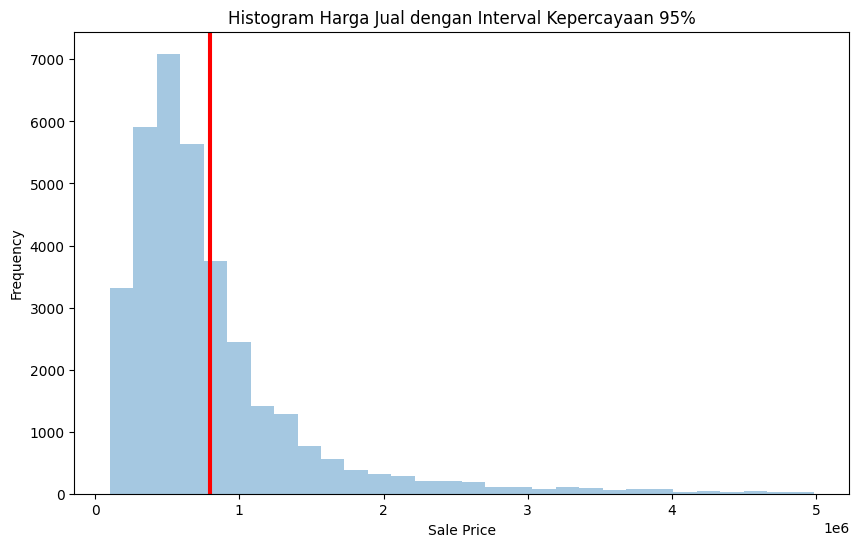

In [749]:
# Filter data
df_c = df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

# Calculate sample mean and standard deviation
sample_mean = df_c['SALE PRICE'].mean()
sample_std = df_c['SALE PRICE'].std()

# Calculate t-value for 95% confidence interval and degrees of freedom
t_value = stats.t.ppf(0.975, len(df_c)-1)

# Calculate margin of error
margin_of_error = t_value * (sample_std / np.sqrt(len(df_c)))

# Calculate confidence interval
conf_int = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print results
print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std)
print("t-value for 95% confidence interval and degrees of freedom:", t_value)
print("Margin of error:", margin_of_error)
print("95% Confidence interval:", conf_int)

# Plot histogram
plt.figure(figsize=(10,6))
sns.distplot(df_c['SALE PRICE'], kde=False, bins=30)
plt.axvline(conf_int[0], c='red')
plt.axvline(conf_int[1], c='red')
plt.title('Histogram Harga Jual dengan Interval Kepercayaan 95%')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


Sesuai dengan analisis diatas, dengan menggunakan nilai alpha 0.05 atau 95% confidence level didapat:
- Rata-rata dari seluruh nilai dalam sample data, yaitu sebesar 795972.4573388677 dollar.
- Sample standard deviation atau ukuran dispersi data, yaitu sebesar 653276.1581477949 dollar.
- t-value untuk 95% confidence interval dengan degrees of freedom sebesar n-1, yaitu sebesar 1.9600323697867617.
- Margin of error (seberapa besar jangkauan nilai sekitar sample mean untuk confidence level 95%) sebesar 6874.567545414863 dollar.
- Rentang nilai yang mengandung nilai mean dengan confidence level 95%, yaitu antara 789097.8897934528 dollar dan 802847.0248842826 dollar. Dalam arti lain, kita dapat dengan keyakinan 95% mengatakan bahwa nilai rata-rata dari seluruh nya berada di antara rentang tersebut.

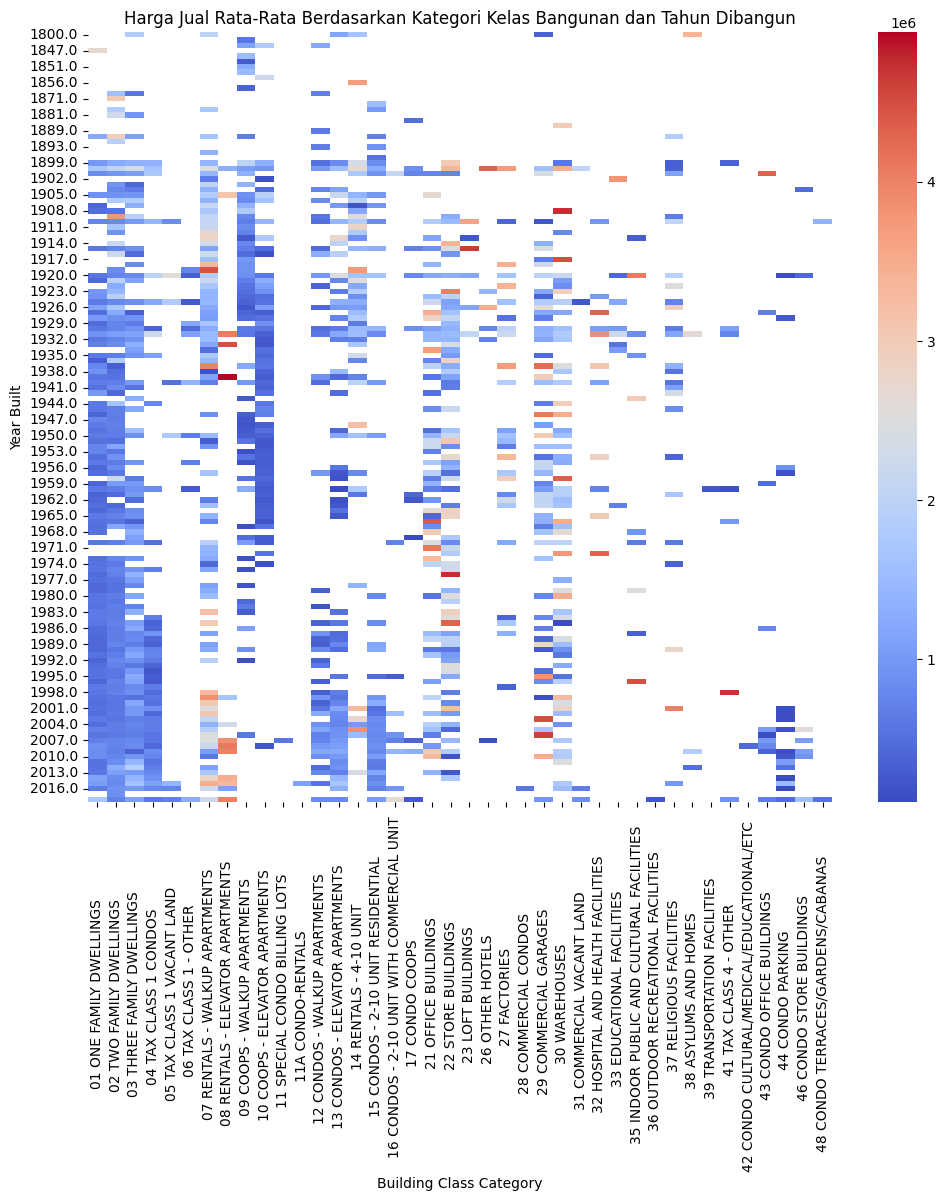

In [750]:
# Filter data
hitmap_fix = df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

# Group data by Building Class Category and Year Built
df_grouped = hitmap_fix.groupby(['BUILDING CLASS CATEGORY', 'YEAR BUILT'], as_index=False).mean(numeric_only = True)

# Pivot data
df_pivot = df_grouped.pivot(index='YEAR BUILT', columns='BUILDING CLASS CATEGORY', values='SALE PRICE')

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_pivot, cmap='coolwarm')
plt.title('Harga Jual Rata-Rata Berdasarkan Kategori Kelas Bangunan dan Tahun Dibangun')
plt.xlabel('Building Class Category')
plt.ylabel('Year Built')
plt.show()

Dalam kasus ini, heatmap menunjukkan rata-rata harga jual (SALE PRICE) berdasarkan kombinasi BUILDING CLASS CATEGORY dan tahun pembangunan (YEAR BUILT). Semakin gelap warna sel, semakin tinggi rata-rata harga jual untuk kombinasi BULDING CLASS CATEGORY dan tahun pembangunan tersebut. Harga penjualan properti di kota New York cenderung lebih tinggi pada kategori Building Class tertentu seperti One Family Dwellings, Condos, dan Elevator Apartments.

# Kesimpulan

Sehingga, dapat disimpulkan bahwa :
- Terdapat perbedaan unit yang terjual antara kategori kelas yang dibangun dari tahun ke tahun, dimana penjualan properti di kota New York cenderung lebih tinggi pada kategori Building Class tertentu seperti One Family Dwellings, Two Family Dwellings dan Condos.
- Properti dengan tahun pembangunan di awal abad ke-20 cenderung memiliki harga yang lebih tinggi, sedangkan properti yang lebih baru (dibangun pada tahun 1980-an hingga 2000-an) cenderung memiliki harga yang lebih rendah.
- Rentang nilai yang mengandung nilai mean dengan confidence level 95%, yaitu antara 789097.8897934528 dollar dan 802847.0248842826 dollar. Dalam arti lain, kita dapat dengan keyakinan 95% mengatakan bahwa nilai rata-rata dari seluruh nya berada di antara rentang tersebut.